In [1]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from MDAnalysis import Universe
from MDAnalysis.analysis.rdf import InterRDF

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


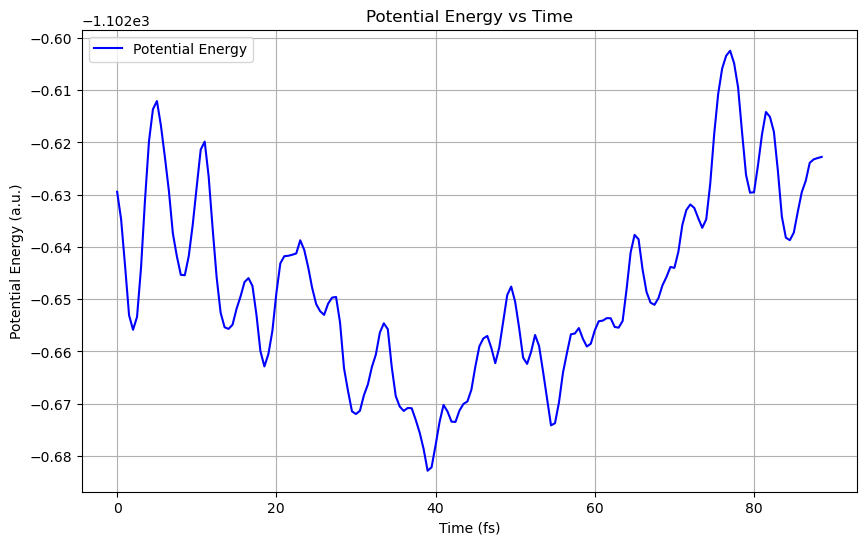

In [2]:
# Load energy file and plot energy vs time
energy_file = "../Runs/Water/WATER_SIMULATION-1.ener"  # Replace with the correct file name
data = np.loadtxt(energy_file, skiprows=1)  # Adjust skiprows based on the file format

# Extract time and potential energy columns
time = data[:, 1]  # Second column: Time in fs
potential_energy = data[:, 4]  # Fifth column: Potential energy in a.u.

# Plot energy versus time
plt.figure(figsize=(10, 6))
plt.plot(time, potential_energy, label="Potential Energy", color="blue")
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u.)")
plt.title("Potential Energy vs Time")
plt.grid(True)
plt.legend()
plt.show()

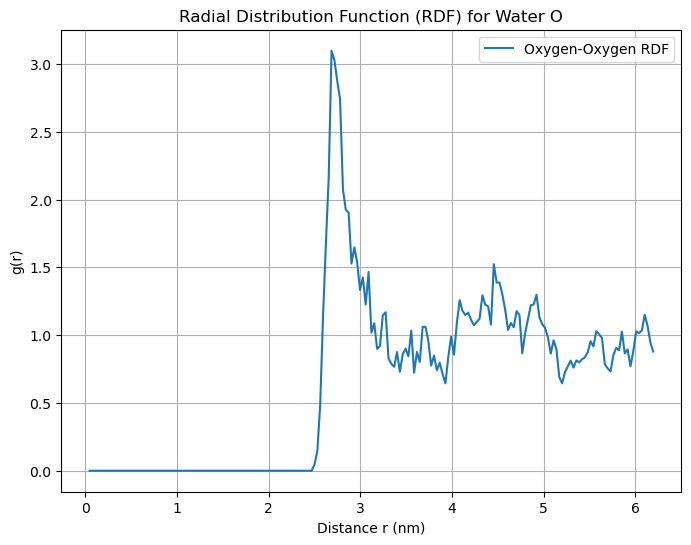

In [30]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

# Load the XYZ file
u = mda.Universe("../Runs/Water/WATER_SIMULATION-pos-1.xyz")

# Set the box dimensions manually (in Angstrom, converted to nm)
box_size = 12.42  # Replace with your box size from input or .xyz file
u.dimensions = [box_size, box_size, box_size, 90.0, 90.0, 90.0]  # [lx, ly, lz, alpha, beta, gamma]

# 3. 选择所有水分子的氧原子
oxygen_atoms = u.select_atoms("name O")

# 4. 计算氧原子的径向分布函数 (RDF)
rdf = InterRDF(oxygen, oxygen, nbins=200, range=(0.0, box_size / 2))
rdf.run()

# 5. 绘制 RDF 曲线
plt.figure(figsize=(8, 6))
plt.plot(rdf.bins[1:], rdf.rdf[1:], label="Oxygen-Oxygen RDF")
plt.xlabel("Distance r (nm)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function (RDF) for Water O")
plt.legend()
plt.grid()
plt.show()